<div style="border:solid Chocolate 2px; padding: 40px">

Ярослав привет, меня зовут Станислав, и я буду проверять твой проект. Предлагаю общаться на «ты», но если это неудобно - дай знать, и мы перейдем на «вы».
Это учебный проект и здесь не стоит бояться делать ошибки, я хочу поделиться своим опытом и помочь тебе стать аналитиком данных.
Уже выполнена большая работа над проектом, давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> Так выделены самые важные замечания. Как только ты их исправишь проект будет принят. </div>

<div class="alert alert-warning">
⚠️  <b>Комментарий с небольшим замечанием или советом ревьюера:</b> Так выделены небольшие замечания или советы. 
</div>

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту

<div class="alert alert-success">
Проделана хорошая аналитическая работа. Код написан чисто, соблюдена структура проекта и написаны выводы. Есть несколько замечаний, исправь их и проект будет принят.
</div>

<div class="alert alert-danger">
  
- доработай, пожалуйста, обработку пропусков и анализ дубликатов 
    
- скорректируй, пожалуйста, исследовательский анализ данных   
    
- посчитай, пожалуйста, долю удаляемых данных    
    
- доработай, пожалуйста, выводы

</div>
</div>



<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту в2

<div class="alert alert-success">
Спасибо за проработку проекта, осталось поправить несколько моментов, добавил уточняющие комментарии.
</div>

<div class="alert alert-danger">
  

    
- скорректируй, пожалуйста, исследовательский анализ данных   
    
- посчитай, пожалуйста, долю удаляемых данных    
    


</div>
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту в3

<div class="alert alert-success">
Отлично, твой проект стал лучше, молодец!

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
#Загружаем библиотеки
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#Читаем файл
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
#Смотрим инфу о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# Выводим первые 5 строк
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
# Количество пропусков 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# Количество явных дубликатов
data.duplicated().sum()

0

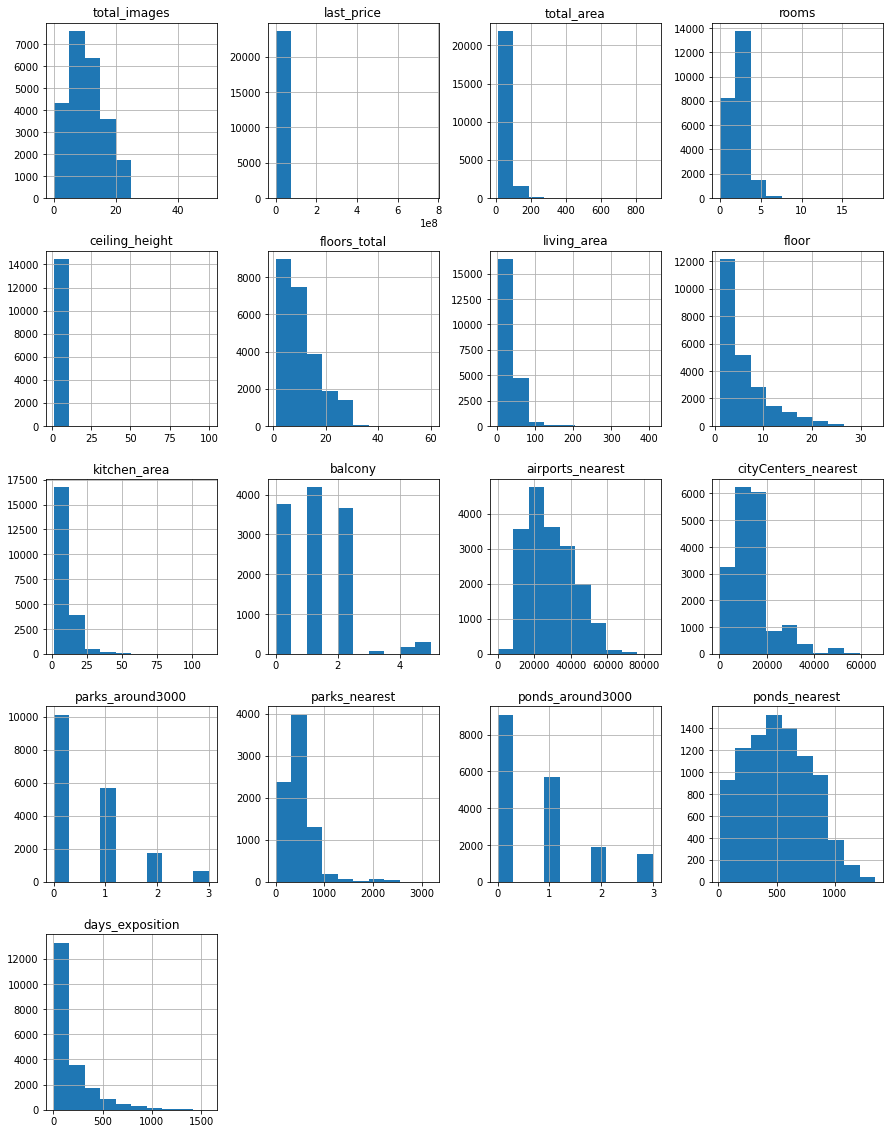

In [7]:
# строим гистограммы
data.hist(figsize=(15, 20));

Вывод:
Всего у нас 23699 записи и 22 столбца. В некоторых столбцах есть пропущенные значения и некорректный тип данных. Явных дубликатов нет. Есть проблема с наисменованием "cityCenters_nearest" 



<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Отличный предварительный анализ 👍


### Выполните предобработку данных

In [8]:
# Заполним пропущенные данные в колонке наличия балконов, где 0 - нет балкона. Также изменим тип данных на int
data.balcony = data.balcony.fillna(0)

In [9]:
# Количество пропусков сейчас + тип данных
data.isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [10]:
# floors_total - этажность
# Строим сводную таблицу с медианным значением
floor_median = data.pivot_table(index='floor', values='floors_total', aggfunc='median').reset_index()

# Строим цикл
for index in range(data.floor.min(), (data.floor.max()+1)):
    data.loc[data['floor'] == index, 'floors_total'] = \
    (data.loc[data['floor'] == index, 'floors_total'] \
    .fillna(floor_median[floor_median['floor'] == index]['floors_total'].sum()))
    
# Меняем тип на int (т.к. этажность не может быть другим показателем например str)
data.floors_total = data.floors_total.astype('int')

In [11]:
# правим высоту потолков где не должно быть этажей меньше одного (это будет уже дом) и больше 35 (максимально высокое здание в СПб)
def floors_total_normal(floors_total):
    if floors_total < 1:
        return 2
    if floors_total > 35:
        return 2
    else:
        return floors_total

In [12]:
data['floors_total'] = data['floors_total'].apply(floors_total_normal)

In [13]:
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 21, 35, 34,  1, 29, 33])

In [17]:
# Смотрим таблицу значений
data.ceiling_height.sort_values(ascending=False).unique()

array([20.  , 17.5 , 14.  , 12.  , 10.3 , 10.  ,  8.3 ,  8.  ,  6.  ,
        5.8 ,  5.6 ,  5.5 ,  5.3 ,  5.2 ,  5.  ,  4.9 ,  4.8 ,  4.7 ,
        4.65,  4.5 ,  4.45,  4.4 ,  4.37,  4.3 ,  4.25,  4.2 ,  4.19,
        4.15,  4.14,  4.1 ,  4.06,  4.  ,  3.98,  3.95,  3.93,  3.9 ,
        3.88,  3.87,  3.86,  3.85,  3.84,  3.83,  3.82,  3.8 ,  3.78,
        3.76,  3.75,  3.7 ,  3.69,  3.68,  3.67,  3.66,  3.65,  3.63,
        3.62,  3.6 ,  3.59,  3.58,  3.57,  3.56,  3.55,  3.54,  3.53,
        3.52,  3.51,  3.5 ,  3.49,  3.48,  3.47,  3.46,  3.45,  3.44,
        3.43,  3.42,  3.4 ,  3.39,  3.38,  3.37,  3.36,  3.35,  3.34,
        3.33,  3.32,  3.31,  3.3 ,  3.29,  3.28,  3.27,  3.26,  3.25,
        3.24,  3.23,  3.22,  3.21,  3.2 ,  3.18,  3.17,  3.16,  3.15,
        3.14,  3.13,  3.12,  3.11,  3.1 ,  3.09,  3.08,  3.07,  3.06,
        3.05,  3.04,  3.03,  3.02,  3.01,  3.  ,  2.99,  2.98,  2.97,
        2.96,  2.95,  2.94,  2.93,  2.92,  2.91,  2.9 ,  2.89,  2.88,
        2.87,  2.86,

In [18]:
# Заменяем высоту потолков - переносим запятую в анамально высоких значениях
data.loc[data['ceiling_height'] >= 10.0, 'ceiling_height'] = data['ceiling_height']/10

In [19]:
# Заменяем высоту потолков - повышаем потолок до мин. высоты
data.loc[data['ceiling_height'] <= 2.0, 'ceiling_height'] = data['ceiling_height']*10

In [21]:
# Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету
data['ceiling_height'] = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

# у меня не всегда с первого раза отрабатывает.....

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b>

Перед заменой на медиану следует провести анализ распределения данных, в тз есть подсказка, что в столбце есть некорректно проставленные значения, как результат корректнее сначала обработать их, потому проводить заполнение пропусков.

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Добавил условие для определения потолков свыше 5 метров, показалось более логичным. Строчка с медианой по прежнему не отрабатывает с первого раза.</div> 


<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера в2:</b> 

Отлично 👍
    
Ты запоняешься пропуски в зависимости от других столбцов и в некоторыз случаях сложно высчитать медиану так как есть пропуски.

In [22]:
# living_area - жилая площадь
# Не так много пропусков можно в целом посчитать через средннее значение
mean_proportion_living_area = (data['living_area'] / data['total_area']).mean()
# заполним пустые ячейки методом fillna 
data['living_area'] = data['living_area'].fillna(data['total_area']*mean_proportion_living_area)

In [23]:
#is_apartment - апартаменты - довольно много пропусков, такие данные не имеет смысла использовать можно просто заменить на False
# для данного поля целесообразно принять пропуски как False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [24]:
# kitchen_area - заполняем средним значением, как в жилой площади
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

In [25]:
# Заполним пропущенные данные в колонке наличия балконов, где 0 - нет балкона. Также изменим тип данных на int
data.balcony = data.balcony.fillna(0)

In [26]:
# Исследуем столбец locality_name на предмет уникальных значений
print('Количество уникальных значений:', data['locality_name'].nunique())
data['locality_name'].unique()

Количество уникальных значений: 364


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [27]:
# Замечены неявные дубликаты, устраним их... приведём значения к нижнему регистру для избавления от дубликатов
data['locality_name'] = data['locality_name'].str.lower()

# Выполним замену ошибки в написании 'поселок' вместо 'посёлок':
data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

# Замена однотипный значений
data['locality_name'] = data.locality_name.str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data.locality_name.str.replace('городской поселок', 'поселок')
data['locality_name'] = data.locality_name.str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')
# Уникальные значения в алфавитном порядке
set(data['locality_name'].unique())

{nan,
 'бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'городской посёлок большая ижора',
 'городской посёлок будогощь',
 'городской посёлок виллози',
 'городской посёлок лесогорский',
 'городской посёлок мга',
 'городской посёлок назия',
 'городской посёлок новоселье',
 'городской посёлок павлово',
 'городской посёлок рощино',
 'городской посёлок свирьстрой',
 'городской посёлок советский',
 'городской посёлок фёдоровское',
 'городской посёлок янино-1',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'д

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> 

Можно определить наличие других неявных дубликатов, таких как 
    


    
- садоводческое некоммерческое товарищество и садовое товарищество
    



<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Добавил про СНТ, но по логике вещёй - это разные формы управления.</div>


<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера в2:</b> 

Отлично 👍

In [28]:
# В данной колонке есть пропущенные значения, считаю верным решением их удалить т.к. здесь нельзя заполнить чем-то средним или медианным
data = data.dropna(subset=['locality_name'])

In [29]:
# airports_nearest - близость к Аэропорту - показатель не используется в дальнейших задачах и вроде не критичен. заполним рандомным значением
data['airports_nearest'] = data['airports_nearest'].fillna(0)

In [30]:
# cityCenters_nearest - близость к центру
# Приведем имя колонки cityCenters_nearest к единому стилю
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
#Т.к. дальше этот параметр не пригодиться. можно заменить проаущенные значения на 0
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(0)

In [31]:
# Число парков в радиусе 3 км
# смотрим какие есть уникальные значения
data['parks_around3000'].unique()

# Видим что всё норм кроме nan. Здесь по логике, можно тоже значнеия заменить на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [32]:
# parks_nearest - парки рядом
# Посмотрим что происходит в этой колонке
data['parks_nearest'].head(10)

# дополнительно я посмотрел, таким же способом на столбцы parks_nearest, ponds_around3000, ponds_nearest -ситуация схожа.
# Будем менять NaN на 0
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(0)

In [33]:
# Меняем тип данных в колонке first_day_exposition
data.first_day_exposition = pd.to_datetime(data.first_day_exposition)

In [34]:
# И так проверим, что все пропуски исчезли
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [35]:
# Смотрим тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

Вывод раздела: заполненны пропуски где это было возможно, и измененны типы данных. Довольно большая часть данных, которая может влиять на итоговую статистику, а так же на решение о прибретении квартир, потеряна при выгрузке таблицы либо отсутствует.


<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b>


Здорово, что пропуски в данных обработаны.

</div>


### Добавьте в таблицу новые столбцы

In [36]:
# Цена одного квадратного метра
data['price_per_square_meter'] = data['last_price']/data['total_area']
# День недели
data['day_publication'] = data['first_day_exposition'].dt.weekday
# Месяц
data['month_publication'] = data['first_day_exposition'].dt.month
# Год
data['years_publication'] = data['first_day_exposition'].dt.year

In [37]:
# функция, выдающая тип этажа квартиры
def type_floor_apart(data):
    if data['floor'] == 1:
        return 'первый'
    if data['floor'] == data['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [38]:
#Добавляем столбцы тип этажа квартиры
data['type_floor_apart'] = data.apply(type_floor_apart, axis = 1)
#Расстояние до центра
data['dist_center_km'] = round(data['city_centers_nearest']/1000).astype('int')

In [39]:
#Проверяем 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_publication,month_publication,years_publication,type_floor_apart,dist_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,другой,16
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.600000,1,False,...,0.0,0.0,0.0,81.0,82920.792079,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,89.797718,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8



<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b>

Все необходимые столбцы добавлены.

</div>


### Проведите исследовательский анализ данных

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> 

В этом разделе проекта нам необходимо проанализировать датасет на наличие аномальных значений и избавиться от них, также важно посчитать долю удаленных данных, чтобы понимать, что мы не слишком сильно почистили датасет.
</div>


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Я так понимаю это какой-то общий совет, не пойму что исправить))? </div>

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера в2:</b> 

Это замечание отражает то, что в данных есть аномалии - аномально большие или малые значения и от них надо избавиться, исключить из датасета. Квартира площадью 12 м2 или 900 м2 или аномально большие площади кухонь, то есть необходимо проанализивать каждый столбец на адекватность данных и избавиться от аномалий, какие инструменты могут помочь: график box plot, метод describe(), гистограммы (но не надо их ограничивать как ты делаешь в случае с жилой площадью, необходимо проанализировать все данные).
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Исправил этажность, высоту потолков и площадь кухни. использовал рекомендации </div>

In [40]:
# Смотрим значения по общей площади
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

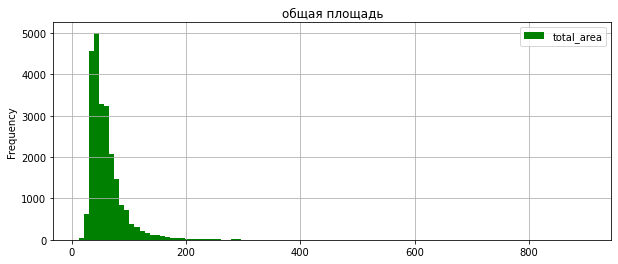

In [41]:
# построем гистограмму
data.plot(kind='hist', title='общая площадь', y='total_area', bins=100, grid=True, figsize=(10,4), color="green")
plt.show()


<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b>

Здорово, что у графиков есть названия.
</div>


<div class="alert alert-warning">
⚠️  <b>Комментарий с советом ревьюера:</b>
    
Для анализа определенного диапозона гистограммы можно воспользоваться range


Вывод: Большая доля квартир имеет площадь 30-60 кв.м После значения 100 кв.м число квартир стремительно убывает. Как размельчить график - я забыл...

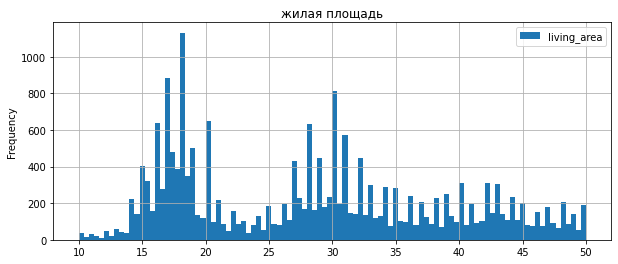

In [42]:
# Смотрим жилую площадь
data.plot(kind='hist', title='жилая площадь', y='living_area', bins=100, grid=True, figsize=(10,4), range=(10,50))
plt.show()

Коэффициент корреляции: 0.5857007715453814


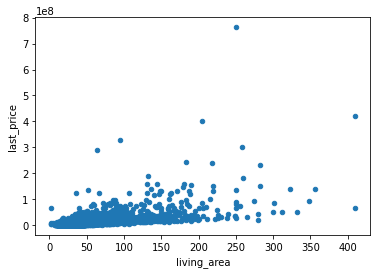

In [56]:
data.plot(x='living_area', y='last_price', kind='scatter');
print('Коэффициент корреляции:', data['living_area'].corr(data['last_price']))

Вывод: В целом тут какие-то выводы сложно сделать, есть небольшие выбросы, но большая часть расределена равномерно

<div class="alert alert-warning">
⚠️  <b>Комментарий с советом ревьюера:</b>
    
Для анализа распределения лучше всегда применять describe() и еще можно строить график box plot()

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> построил box plot </div>

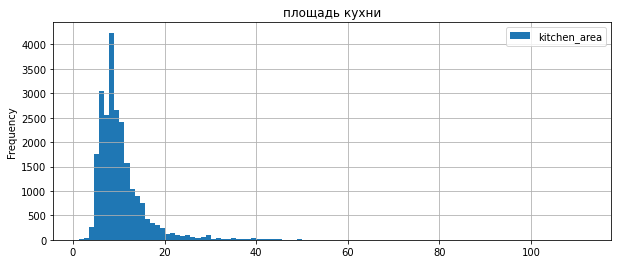

In [43]:
# Смотрим площади кухонь
data.plot(kind='hist', title='площадь кухни', y='kitchen_area', bins=100, grid=True, figsize=(10,4))
plt.show()

Вывод: Больше всего кухонь с 10 кв.м.

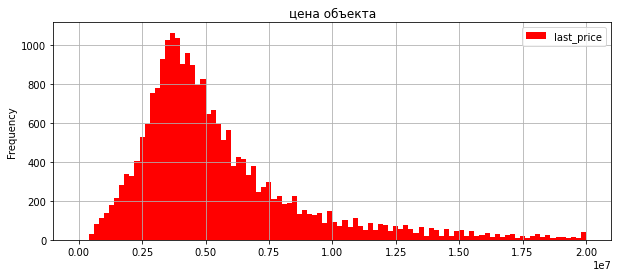

In [44]:
# Цена обьекта
data.plot(kind='hist', title='цена объекта', y='last_price', bins=100, grid=True, figsize=(10,4), range=(0,20000000), color='red')
plt.show()

Вывод: Цена распределена более-менее хорошо

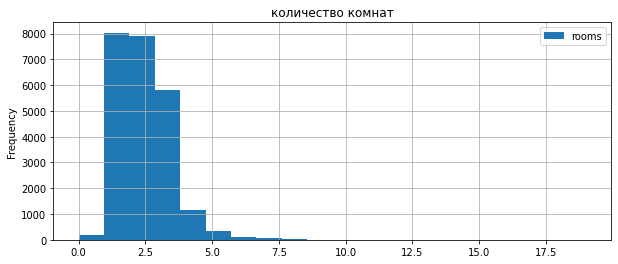

In [45]:
data.plot(kind='hist', title='количество комнат', y='rooms', bins=20, grid=True, figsize=(10,4))
plt.show()

Вывод: Однокомнатных квартир больше

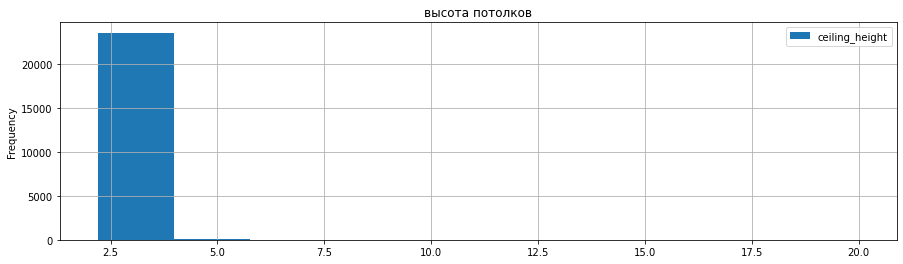

In [46]:
data.plot(kind='hist', title='высота потолков', y='ceiling_height', bins=10, grid=True, figsize=(15,4))
plt.show()

Вывод: Т.к. я правил выше высоту потолков, вышло то, что потолки с высотой 2,5 метра более популярны. 

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> 

Добавь, пожалуйста, вывод

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b>Готово.</div>

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера в2:</b> 

Обрати внимание на значения высоты менее 2 метров, разве такие квартиры существуют?

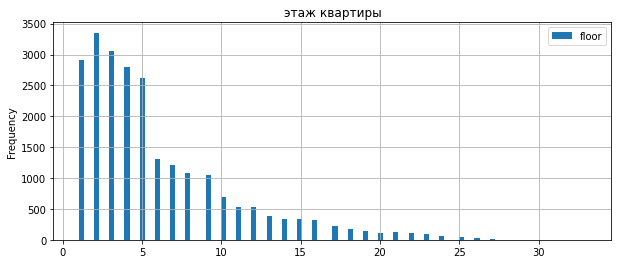

In [49]:
data.plot(kind='hist', title='этаж квартиры', y='floor', bins=100, grid=True, figsize=(10,4))
plt.show()

Вывод: 2 этаж популярнее

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> 

Добавь, пожалуйста, вывод
    


<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Готово, вывод бы просто ниже </div>

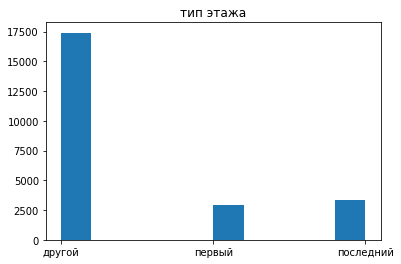

In [50]:
plt.hist(data['type_floor_apart'])
plt.title('тип этажа')
plt.show()

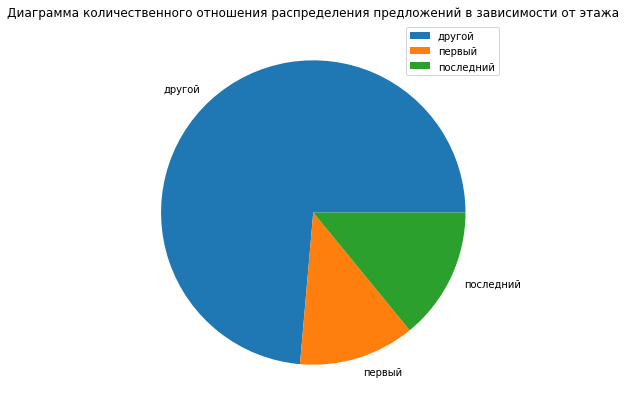

In [51]:
data.pivot_table(index='type_floor_apart',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', title='Диаграмма количественного отношения распределения предложений в зависимости от этажа')

plt.show()

Вывод: Первый и последний этажи - не пользуются спросом

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> 

Почему 2-ой?

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Это вывод относился к 2м последним графикам, сейчас под каждый график написал отдельно и добавил красивее диаграмму</div>

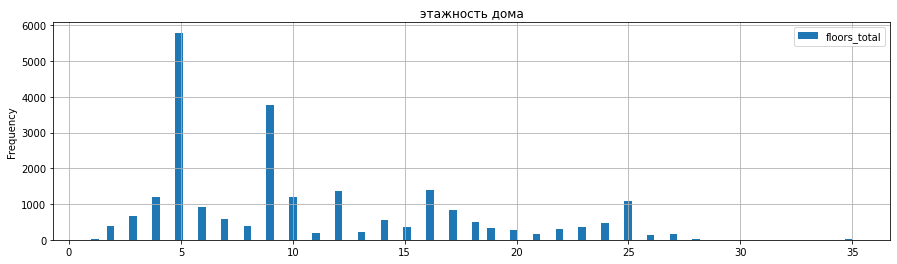

In [52]:
data.plot(kind='hist', title='этажность дома', y='floors_total', bins=100, grid=True, figsize=(15,4))
plt.show()

Вывод: Пятиэтажки занимают почетное первое место, далее 9ти этажки

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера:</b> 

Добавь, пожалуйста, вывод
    
Обрати, в данных есть значения, которые не соответсвуют реальным из открытых источников

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Вывод дописал. Про данные не совсем понял, что там надо исправить</div>

<div class="alert alert-danger">
❌ <b>Комментарий с замечанием ревьюера в2:</b> 

Напиши в поисковике: самое высокое жилое здание в СПб, так ты узнаешь, максимальную этажность в городе и тем самым поймешь, что в данных есть значения, которые не соответствуют реальности и их надо удалить из датасета.

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Исправил высоту, прописал фильтр </div>

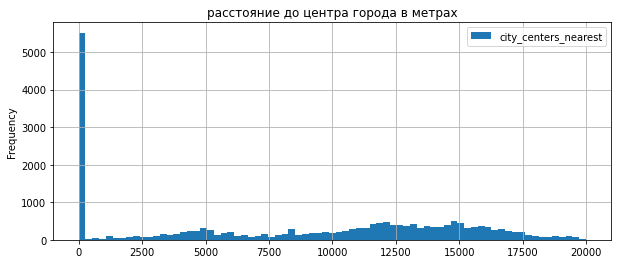

In [41]:
data.plot(kind='hist', title='расстояние до центра города в метрах', y='city_centers_nearest', bins=75, grid=True, figsize=(10,4), range= (0,20000))
plt.show()

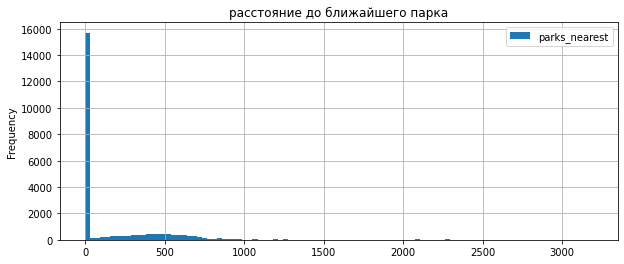

In [42]:
data.plot(kind='hist', title='расстояние до ближайшего парка', y='parks_nearest', bins=100, grid=True, figsize=(10,4) )
plt.show()

#### Изучим теперь как быстро продавались квартиры. Для этого построим гистограмму, посчитаем среднее и медиану.

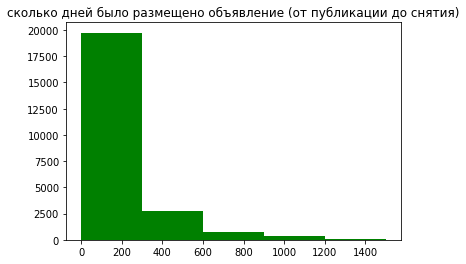

In [43]:
#Строим гистограмму по дням
plt.hist(data['days_exposition'], bins=5, range=(0, 1500), color='green')
plt.title('сколько дней было размещено объявление (от публикации до снятия)')
plt.show()

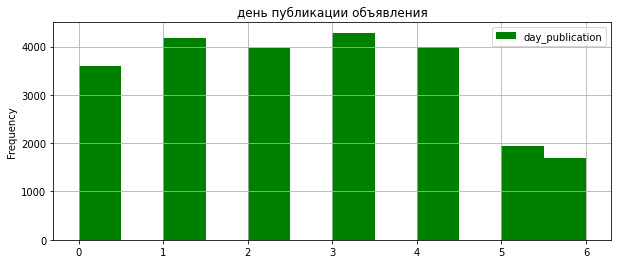

In [44]:
data.plot(kind='hist', title='день публикации объявления', y='day_publication', bins=12, grid=True, figsize=(10,4), color='green')
plt.show()

In [45]:
print('Среднее значение количества дней на продаже:', data['days_exposition'].mean())
print('Медианное значение количества дней на продаже:', data['days_exposition'].median())

Среднее значение количества дней на продаже: 156.4489640591966
Медианное значение количества дней на продаже: 73.0


In [46]:
data['days_exposition'].describe()

count    23650.000000
mean       156.448964
std        213.564548
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

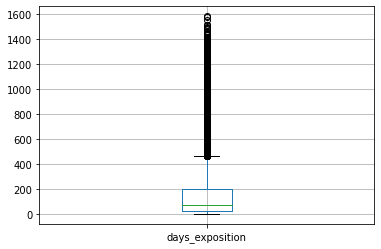

In [47]:
data.boxplot(column=['days_exposition']);

Вывод: Большинство продаж приходиться на 73 день, долгие продажи 178 дней, быстрые продажи в среднем 22 дня

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b>

Согласен, здорово, что построен график box plot()

</div>


#### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построим графики, которые показывают зависимость цены от параметров

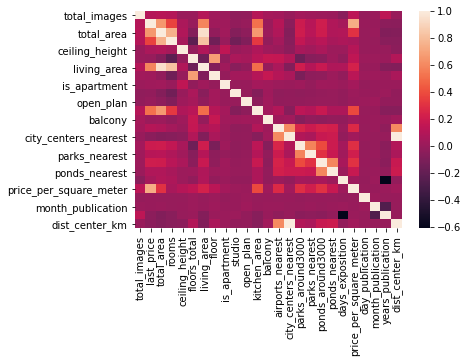

In [48]:
# Посмотрим на общую корреляцию
sns.heatmap(data.corr());

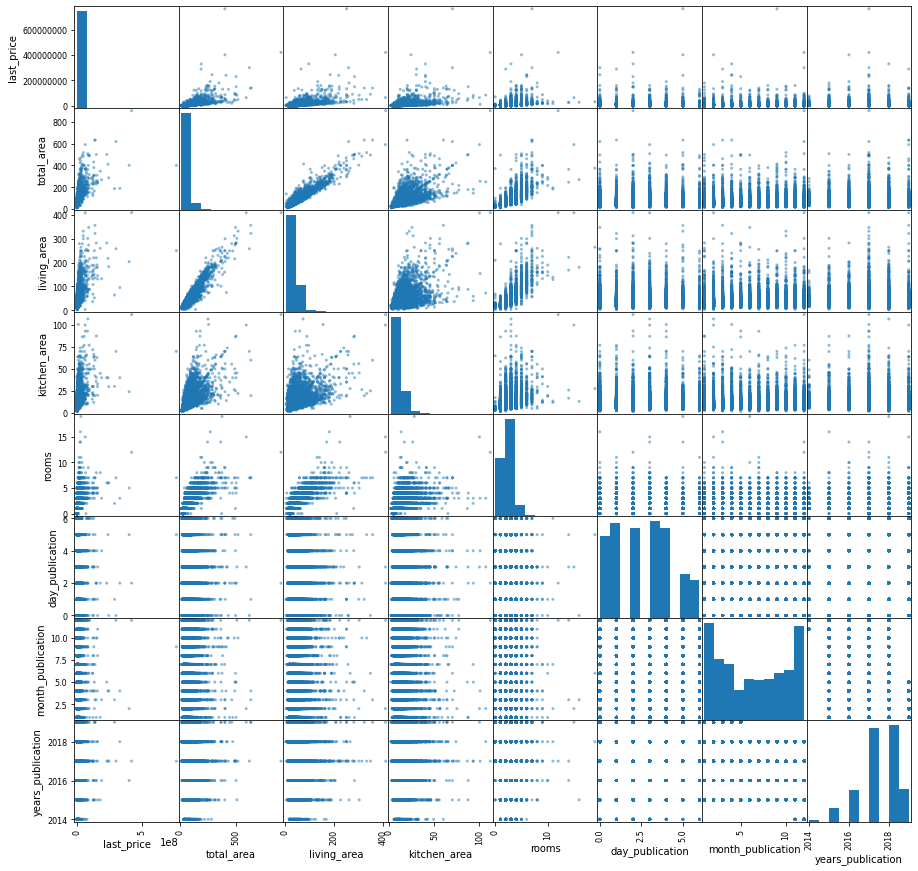

In [49]:
#  Посттроим матрицу диаграмм рассеяния для иллюстрации зависимостей нужных признаков.
pd.plotting.scatter_matrix(
    data[['last_price', 'total_area', 'living_area', 'kitchen_area',\
         'rooms', 'type_floor_apart', 'day_publication', 'month_publication', 'years_publication']],
    figsize=(15, 15)
);

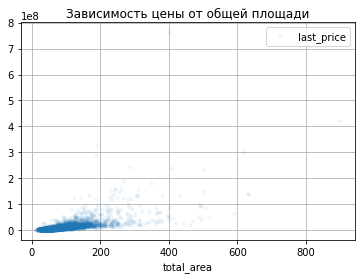

In [50]:
data.plot(x='total_area', y='last_price', style='.', title='Зависимость цены от общей площади', alpha=0.05, grid=True, sharex=False)
plt.show()

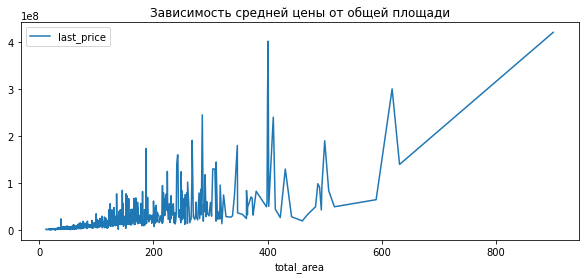

In [51]:
data.pivot_table(index='total_area', values='last_price').plot(style='-',title='Зависимость средней цены от общей площади', figsize=(10,4))
plt.show()

In [52]:
print('Коэффициент корреляции цены от общей площади', round(data['total_area'].corr(data['last_price']), 2))

Коэффициент корреляции цены от общей площади 0.65


Вывод: На графике зависимости средней цены от общей площади виден минимальный разброс цен для площади до 100 кв.м, средний разброс цен от 100 до 180 кв.м, и максимальный разброс цен для площадей свыше 210 кв.м. Коэффициент корреляции = 0,65, что подтверждает наличие зависимости.

Коэффициент корреляции цены от жилой площади 0.59


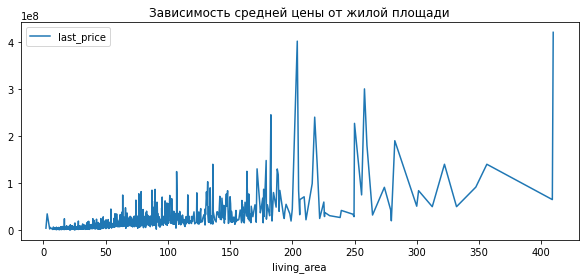

In [53]:
data.pivot_table(index='living_area', values='last_price').plot(style='-',title='Зависимость средней цены от жилой площади', figsize=(10,4))
plt.show
print('Коэффициент корреляции цены от жилой площади', round(data['living_area'].corr(data['last_price']), 2))

Коэффициент корреляции цены от площади кухни 0.51


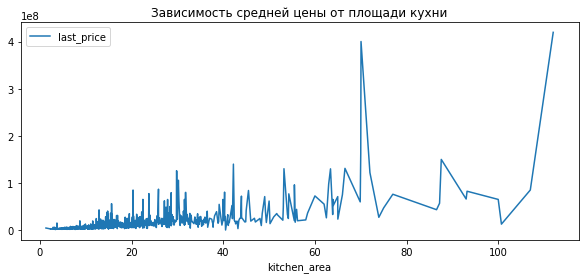

In [53]:
data.pivot_table(index='kitchen_area', values='last_price').plot(style='-',title='Зависимость средней цены от площади кухни', figsize=(10,4))
plt.show
print('Коэффициент корреляции цены от площади кухни', round(data['kitchen_area'].corr(data['last_price']), 2))

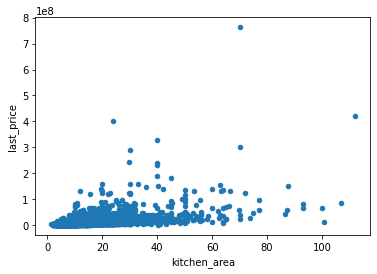

In [57]:
data.plot(x='kitchen_area', y='last_price', kind='scatter');

<div class="alert alert-warning">
⚠️  <b>Комментарий с советом ревьюера:</b>
    
Для анализа корреляции лучше строить scatter plot, такой график больше подходит для этого типа анализа

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> построил scatter plot </div>

Коэффициент корреляции цены от количества комнат 0.36


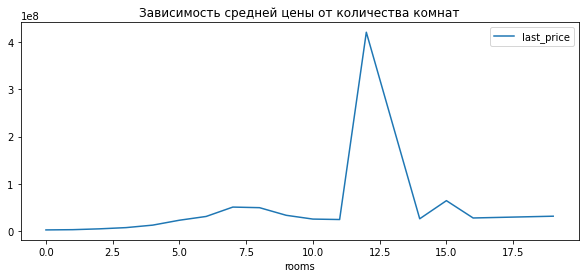

In [64]:
data.pivot_table(index='rooms', values='last_price').plot(style='-',title='Зависимость средней цены от количества комнат', figsize=(10,4))
plt.show
print('Коэффициент корреляции цены от количества комнат', round(data['rooms'].corr(data['last_price']), 2))

Text(0.5, 1.0, 'тип этажа')

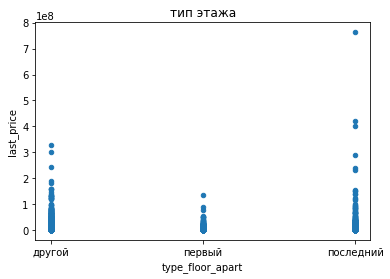

In [65]:
data.plot(x='type_floor_apart', y='last_price', kind='scatter');
plt.title('тип этажа')

Коэффициент корреляции цены от дня недели размещения объявления 0.0


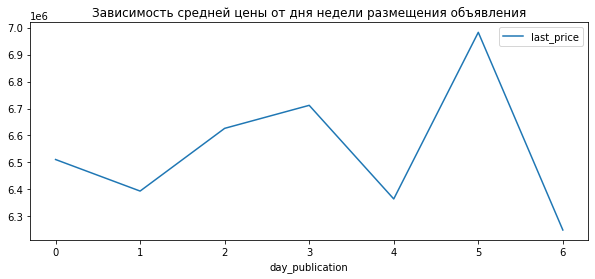

In [66]:
data.pivot_table(index='day_publication', values='last_price')\
.plot(style='-',title='Зависимость средней цены от дня недели размещения объявления', figsize=(10,4))
plt.show
print('Коэффициент корреляции цены от дня недели размещения объявления', round(data['day_publication'].corr(data['last_price']), 2))

Коэффициент корреляции цены от дня недели размещения объявления 0.0


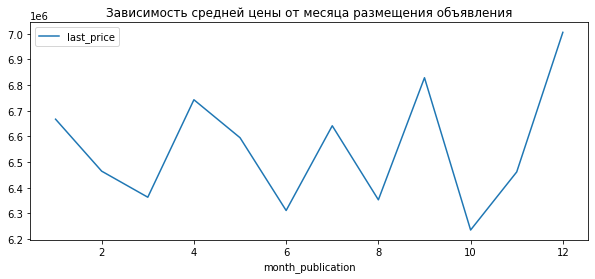

In [67]:
data.pivot_table(index='month_publication', values='last_price')\
.plot(style='-',title='Зависимость средней цены от месяца размещения объявления', figsize=(10,4))
plt.show
print('Коэффициент корреляции цены от дня недели размещения объявления', round(data['month_publication'].corr(data['last_price']), 2))

Коэффициент корреляции цены от дня недели размещения объявления -0.04


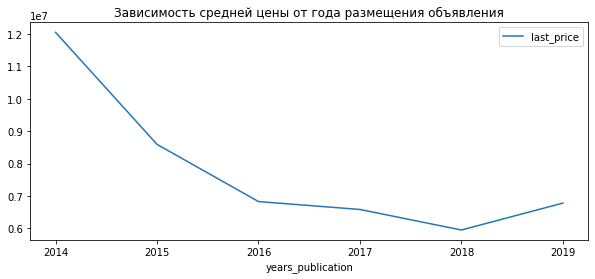

In [68]:
data.pivot_table(index='years_publication', values='last_price')\
.plot(style='-',title='Зависимость средней цены от года размещения объявления', figsize=(10,4))
plt.show
print('Коэффициент корреляции цены от дня недели размещения объявления', round(data['years_publication'].corr(data['last_price']), 2))

Вывод: Кореляции в подаче обьявлений нет. с 2014 года недвижимость дешевела. Перелом наступил 2018
Что касаемо стоимости, то больше всего на неё общая площадь квартиры. что почти закономерно.

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Отличный анализ корреляции 👏
    
</div>


#### Посчитаем среднюю цену одного квадратного метра

In [69]:
data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'mean', 'median'])\
.sort_values(('count', 'price_per_square_meter'), ascending=False)\
.head(10)\
.sort_values(('mean', 'price_per_square_meter'), ascending=False)

,count,mean,median
,price_per_square_meter,price_per_square_meter,price_per_square_meter
locality_name,,,
санкт-петербург,15721,114849.008794,104761.904762
пушкин,369,103125.819291,100000.000000
деревня кудрово,299,92473.547576,91860.465116
посёлок парголово,327,90175.913458,91642.857143
посёлок мурино,556,85681.762601,85878.462169
посёлок шушары,440,78677.364217,76876.172608
колпино,338,75424.579098,74723.748474
гатчина,307,68746.146763,67796.610169


Вывод: Из представленных 10 локаций с наибольшим количеством объявлений, макимальная средняя стоимость в Санкт-Петербурге, минимальная средняя стоимость в Выборге.

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Согласен
    
</div>


#### Выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим их среднюю стоимость на разном удалении от центра

In [70]:
data_St_P = data[data['locality_name'] == 'санкт-петербург']
data_St_P.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_publication,month_publication,years_publication,type_floor_apart,dist_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,другой,16
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,89.797718,9,False,...,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8
7,5,7915000.0,71.6,2019-04-18,2,2.75,24,40.437211,22,False,...,0.0,0.0,0.0,0.0,110544.692737,3,4,2019,другой,12


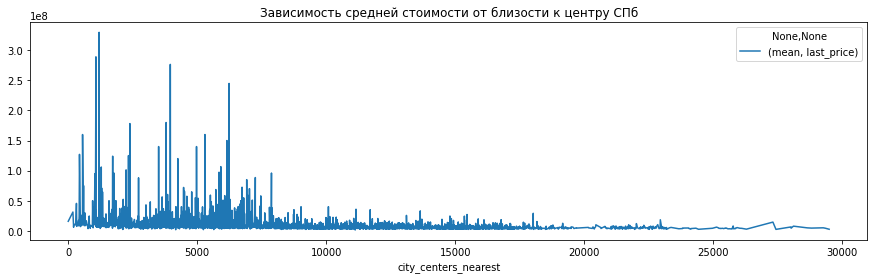

In [71]:
data[data['locality_name']=='санкт-петербург']\
.pivot_table(index='city_centers_nearest', values=['last_price'], aggfunc=['mean'])\
.plot(style='-',title='Зависимость средней стоимости от близости к центру СПб', figsize=(15,4))
plt.show()

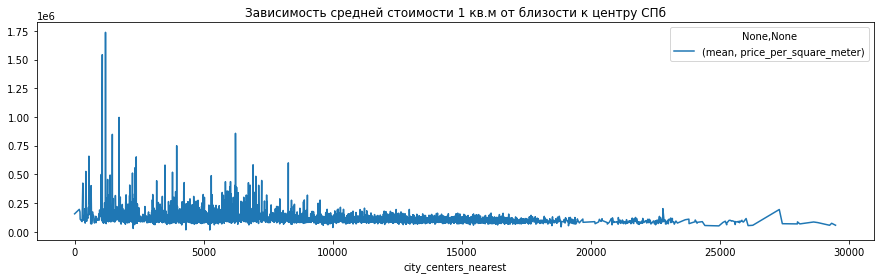

In [72]:
data[data['locality_name']=='санкт-петербург']\
.pivot_table(index='city_centers_nearest', values=['price_per_square_meter'], aggfunc=['mean'])\
.plot(style='-',title='Зависимость средней стоимости 1 кв.м от близости к центру СПб', figsize=(15,4))
plt.show()

При анализе получена очевидная картина снижения средней стоимости недвижимости при удаления от центра. Ярко выражен резкий рост стоимости в 2х км. Вместе с тем, можно отметить снижение стоимости на расстоянии 7 км, и один из пиков стоимости для. Также виден пик роста цен для расстояния 27 км.

<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Корректный анализ, всплеск - скорее всего какой-то один дорогостоящий объект.
    
</div>


### Напишите общий вывод

Обследовав архив с данными по недвижимости, мы сделали следующее:

- предобработка данных
- подсчет новых параметров
- поиск зависимостей

В первой части проекта  были обработаны данные а именно: 
- проанализировали пропуски в дынных
- в некоторых данных пропуски заменили на средние/медианые значения (распределение не изменилось в таком случае) 
- где-то вместо пропусков поставили 0 для того, чтобы не засорять данные, и в таких параметрах, как балкон и аппартаменты. 
Данные полность были нормализированы.

Во второй части проекта мы добавили такие параметры как:
- цена одного квадратного метра
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее),
- месяц публикации объявления 
- год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
Это было сделано для того, чтобы дальнейши анализ был более гибкий и полный

В третьей части проекта мы проанализировали зависимости признаков от цены. 
Было выяснено:
- самая сильная зависимость присутсвует между ценой и общей площадью квартиры 
- Следующая зависимость цена и жилая площадь 
- Затем зависимость цены и площади кухни 

Стоимость никак не зависит от публикации в дни, месяца, но общая стоимость падала в зависимости от года размещения

Так же на цену влияет расположение от центра, парка, пруда и аэропорта, однако эта зависимость не является определяющей. Цена квартиры так же зависит от этажа, на котором она находится (квартира дешевле на первом и на последнем этаже). В проекте мы анализировали Санкт-Петербург и Ленинградскую область. 

Было выяснено, что самая высокая цена квадратного метра в Санкт-Петербурге. Так же если рассматривать публикаци только в Санкт-Петербурге, то цена квартиры уже сильнее зависит от расположения от центра города, чем в других населенных пунктах.


<div class="alert alert-success">
✔️ <b>Комментарий с комплиментом ревьюера:</b> 

Молодец, ты сформулировал отличный вывод, который отвечает на цель исследования.
    
</div>


<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту

<div class="alert alert-success">
Проделана хорошая аналитическая работа. Код написан чисто, соблюдена структура проекта и написаны выводы. Есть несколько замечаний, исправь их и проект будет принят.
</div>

<div class="alert alert-danger">
  
- доработай, пожалуйста, обработку пропусков и анализ дубликатов 
    
- скорректируй, пожалуйста, исследовательский анализ данных   
    
- посчитай, пожалуйста, долю удаляемых данных    
    
- доработай, пожалуйста, выводы

</div>
</div>



<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Остались вопросы, в целом общие моменты поравил</div>

<div style="border:solid Chocolate 2px; padding: 40px">

# Общий вывод ревьюера по проекту в2

<div class="alert alert-success">
Спасибо за проработку проекта, осталось поправить несколько моментов, добавил уточняющие комментарии.
</div>

<div class="alert alert-danger">
  

    
- скорректируй, пожалуйста, исследовательский анализ данных   
    
- посчитай, пожалуйста, долю удаляемых данных    
    


</div>
</div>

<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> скорректировал исследовательски анализ данных по площади кухни, этажности и высоте потолков. Но не пойму как посчитать долю удаляемых данных ?</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.